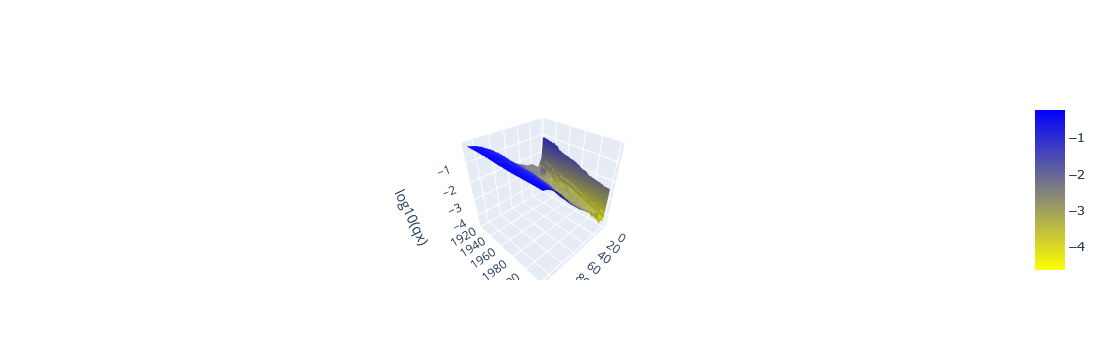

In [2]:
# Import necessary libraries
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd
from scipy.interpolate import griddata
import numpy as np

# Read in the data from the provided csv file
df = pd.read_csv('https://raw.githubusercontent.com/christopherpaine/MDD/main/Mortality_tables/HMD_UK_males_1x1.csv',header=0)

# Create numpy arrays for the x, y, and z values by extracting the relevant columns from the data frame
x, y, z = (np.array(df[df['Age']!='110+'][col], dtype=float) for col in ['Age', 'Year', 'qx'])

# Create 100 equally spaced x and y values to use for the surface plot
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)

# Generate a mesh grid from the xi and yi arrays
X, Y = np.meshgrid(xi, yi)

# Use the griddata function to interpolate the z values onto the mesh grid
Z = griddata((x,y),z,(X,Y), method='cubic')

# Create a Figure object
fig = go.Figure(data=[go.Surface(z=np.log10(Z), x=xi, y=yi,
                          colorscale=[[0, 'yellow'], [1, 'blue']])])

# Update the layout of the figure to include axis labels and aspect ratio
fig.update_layout(scene=dict(
        xaxis_title='Age',
        yaxis_title='Year',
        zaxis_title='log10(qx)',
        #aspectmode='manual',
        #aspectratio=dict(x=1, y=1, z=0.7)
        ))

# Show the figure
fig.show()






